# Logistic Regression

1. Data Exploration:

In [3]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve



In [4]:
data=pd.read_csv(r"C:\Users\dorkar\Documents\conda\DS\Logistic Regression\Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.isnull().sum()/len(data)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
data['Age'].isnull().sum()

177

In [11]:
age=data['Age'].mean()
age

29.69911764705882

In [12]:
data['Age']=data['Age'].fillna(age)

In [13]:
data['Age'].isnull().sum()

0

In [14]:
data['Cabin'].isnull().sum()

687

In [15]:
Cabin=data['Cabin'].mode()[0]
Cabin

'B96 B98'

In [16]:
data['Cabin']=data['Cabin'].fillna(Cabin)
data['Cabin'].isnull().sum()

0

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [18]:
data.dropna(inplace=True)

In [28]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
data.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [32]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

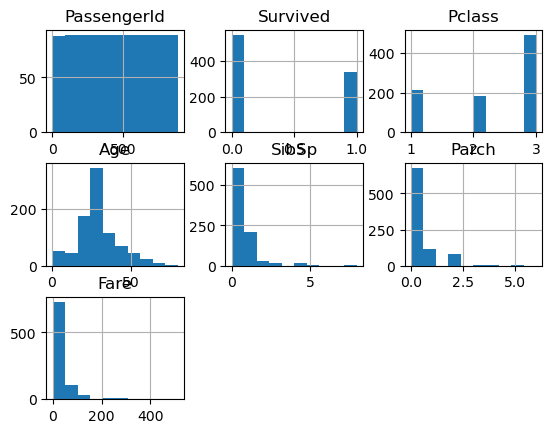

In [35]:
data.hist()

<Axes: xlabel='Survived', ylabel='count'>

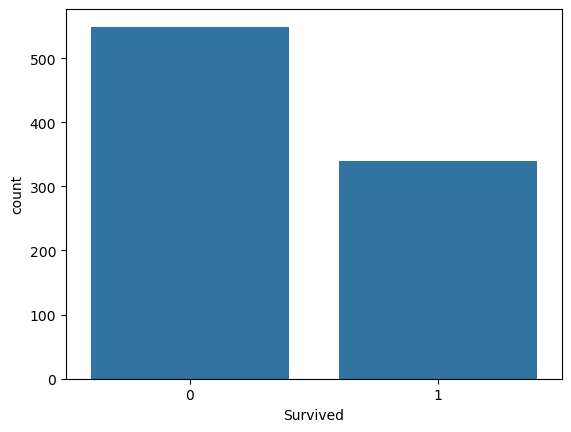

In [36]:
sns.countplot(x='Survived',data=data)

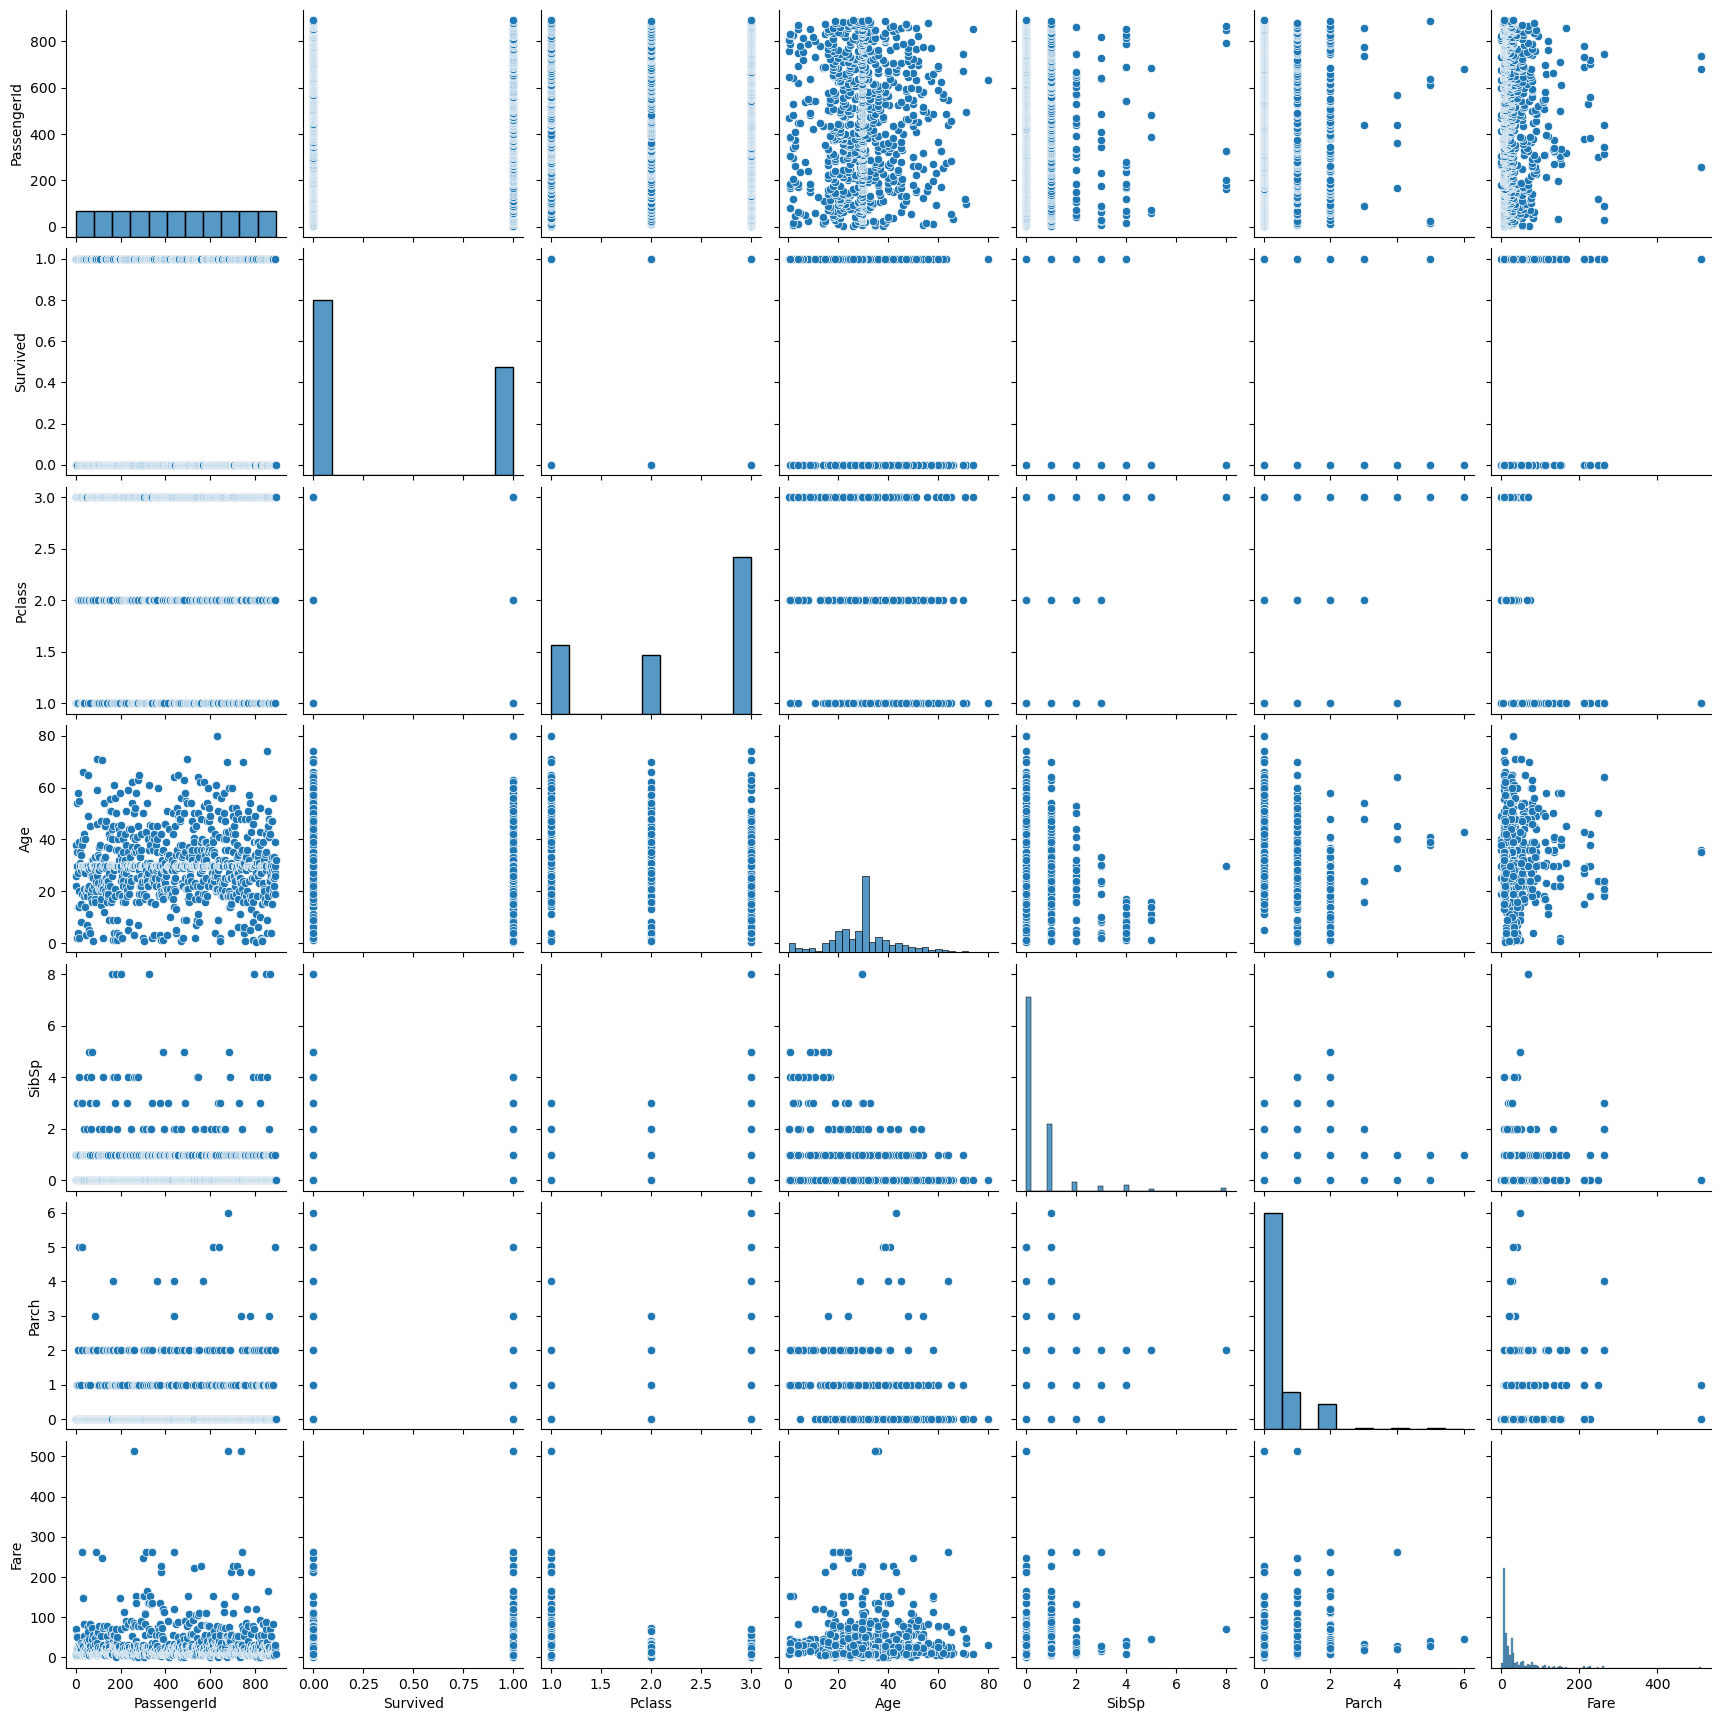

In [37]:
sns.pairplot(data)

In [38]:
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum()/len(data)*100)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
# Remove outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

In [ ]:
# droping unused column 
data.drop(['Name','PassengerId'],axis=1,inplace=True)

Data Encoding : categorical to numerical

In [ ]:
label=LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label.fit_transform(data[column])
data

In [ ]:
data.corr()

Data Visualization:

In [ ]:
plt.hist(data)
plt.show()

In [ ]:
plt.boxplot(data)
plt.show()

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

Splitting data

In [ ]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

Standardization

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Model Building

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

In [ ]:
y_pred_test=model.predict(x_test)
print(y_pred_test)

In [ ]:
y_pred_train=model.predict(x_train)
print(y_pred_train)

4. Model Evaluation:

In [ ]:
print(classification_report(y_pred_test,y_test))

In [ ]:
roc_auc=roc_auc_score(y_train, y_pred_train)
print(roc_auc)

In [ ]:
print(accuracy_score(y_pred_train,y_train))

In [ ]:
confusion_matrix(y_pred_train,y_train)

In [ ]:
print(classification_report(y_pred_train,y_train))

In [ ]:
print(accuracy_score(y_pred_test,y_test))

In [ ]:
# Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_train,y_train)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

5. Interpretation:

In [ ]:
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

Interpreting the significance of features involves analyzing the coefficients obtained from the logistic regression model. Features with higher absolute coefficients are considered more significant in predicting the target variable. Positive coefficients suggest that an increase in the feature value increases the likelihood of the positive class (survival in this case), while negative coefficients suggest the opposite. Features with coefficients close to zero have less impact on the prediction.

## 1. What is the difference between precision and recall?
Precision:Precision measures the accuracy of positive predictions made by the model. It answers the question: "Out of all the instances predicted as positive, how many are actually positive?"
Precision is calculated as the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (instances incorrectly predicted as positive).


Recall:Recall measures the ability of the model to correctly identify all positive instances. It answers the question: "Out of all the actual positive instances, how many did the model correctly predict as positiv
Recall is calculated as the ratio of true positives to the sum of true positives and false negatives (instances incorrectly predicted as negative).
"

## 2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a statistical technique used to evaluate the performance of machine learning models by partitioning the dataset into subsets, training the model on some subsets, and testing it on other subsets. The main idea behind cross-validation is to assess how well the model generalizes to new, unseen data.
cross-validation is crucial in binary classification (as well as other types of classification tasks) for providing a more accurate assessment of model performance, mitigating overfitting, optimizing hyperparameters, and ensuring robustness, especially in scenarios where the data is limited or imbalanced.


